# scikit-multiflow demo

In [1]:
# Required to 'see' dynamic plots in Jupyter notebooks
%matplotlib notebook

In [2]:
from skmultiflow.data import FileStream
from skmultiflow.data import SEAGenerator
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.trees import HoeffdingTree
from skmultiflow.trees import HAT
from skmultiflow.drift_detection import ADWIN

from sklearn.linear_model import SGDClassifier

import numpy as np
import matplotlib.pyplot as plt

---
## 1. Running a classification task

We will use the `SEA` stream generator

In [3]:
stream = SEAGenerator(classification_function=2, random_state=1)

Prepare the stream for use

In [4]:
stream.prepare_for_use()

Setup a classifier, in this case `Linear SVM` with `SGD` training*

In [5]:
classifier = SGDClassifier()

Setup the evaluator, we will use prequential evaluation

In [6]:
eval = EvaluatePrequential(show_plot=True,
                           max_samples=20000,
                           metrics=['accuracy', 'kappa', 'running_time', 'model_size'])

Run the evaluation

<IPython.core.display.Javascript object>


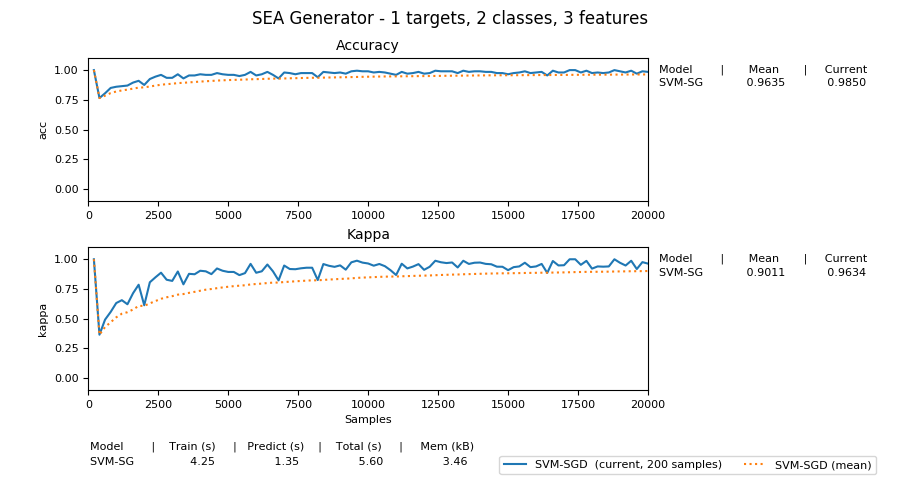

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [10.20s]
Processed samples: 20000
Mean performance:
SVM-SGD - Accuracy     : 0.9635
SVM-SGD - Kappa        : 0.9011
SVM-SGD - Training time (s)  : 4.25
SVM-SGD - Testing time  (s)  : 1.35
SVM-SGD - Total time    (s)  : 5.60
SVM-SGD - Size (kB)          : 3.4551


In [7]:
eval.evaluate(stream=stream, model=classifier, model_names=['SVM-SGD']);

---
## 2. Concept Drift detection

Load a data stream with concept drift

In [8]:
drift_stream = np.load('drift_stream.npy')

<IPython.core.display.Javascript object>


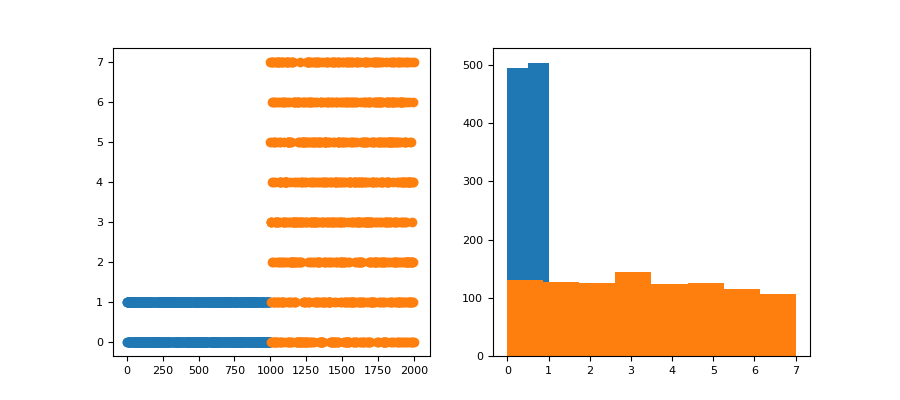

In [9]:
x = [i for i in range(len(drift_stream))]

fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].scatter(x[:999], drift_stream[:999]);
ax[0].scatter(x[1000:], drift_stream[1000:]);
ax[1].hist(drift_stream[:999], bins=2);
ax[1].hist(drift_stream[1000:], bins=8);

The first half of the data stream contains a sequence corresponding to a normal distribution of integers from 0 to 1. From index 999 to 1999 the sequence is a normal distribution of integers from 0 to 7.

Next, we instantiate the drift detector, in this case `ADWIN`

In [10]:
adwin = ADWIN()

Run the detection test

In [11]:
for i in range(drift_stream.size):
    adwin.add_element(drift_stream[i])
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

Change detected at index 1023
Change detected at index 1055
Change detected at index 1087
Change detected at index 1151


---
## 3. Comparing classifiers

Load stream data from a file

In [12]:
stream = FileStream("agr_a_20k.csv")

Prepare the stream for use

In [13]:
stream.prepare_for_use()

Create a list of classifiers to compare, in this case `Hoeffding Tree` and `Hoeffding Adaptive Tree`

In [14]:
cfiers = [HoeffdingTree(), HAT()]

Setup the evaluator, we will use prequential evaluation

In [15]:
eval = EvaluatePrequential(show_plot=True,
                           metrics=['accuracy', 'kappa', 'model_size'],
                           n_wait=100)

Run the evaluation

<IPython.core.display.Javascript object>


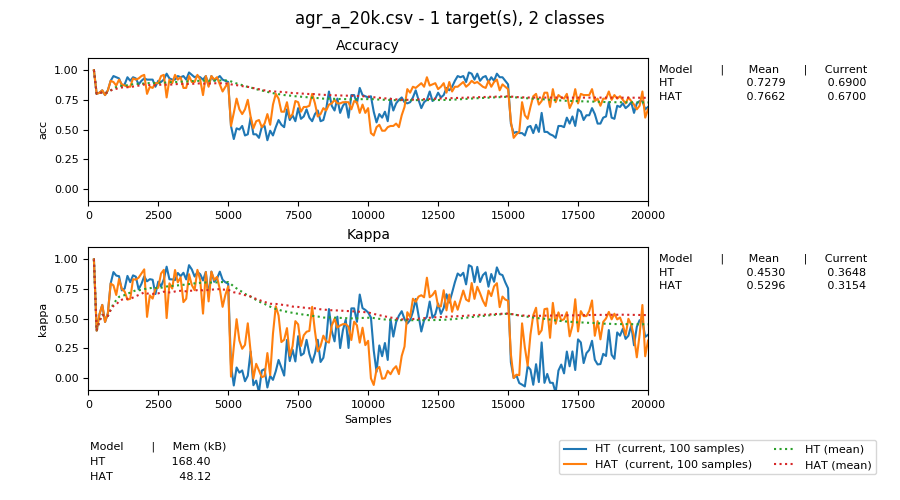

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [30.85s]
Processed samples: 20000
Mean performance:
HT - Accuracy     : 0.7279
HT - Kappa        : 0.4530
HT - Size (kB)          : 168.4023
HAT - Accuracy     : 0.7662
HAT - Kappa        : 0.5296
HAT - Size (kB)          : 48.1240


In [16]:
eval.evaluate(stream=stream, model=cfiers, model_names=['HT', 'HAT']);